In [138]:
#import packages required for clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import pca
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import *
from IPython.display import display
import random
%matplotlib inline

In [139]:
#read the data
data=pd.read_csv('College.csv')

In [140]:
data.sample(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
76,Caldwell College,Yes,1011,604,213,17,42,693,868,8900,4600,425,1000,87,96,13.9,25,7922,55
566,SUNY College at Buffalo,No,5318,3515,1025,8,29,7626,2091,6550,4040,550,1230,71,78,18.7,12,7511,42
387,Morehouse College,Yes,3708,1678,722,41,66,2852,153,7050,5490,250,600,71,74,17.8,10,8122,83
525,Simpson College,Yes,1016,872,300,27,57,1116,602,11250,4980,550,1400,66,73,15.8,36,7411,70
689,University of the South,Yes,1445,966,326,46,83,1129,24,15350,4080,450,810,89,93,10.3,52,18784,82


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.4+ KB


In [142]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [143]:
data.isnull().any()

Unnamed: 0     False
Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

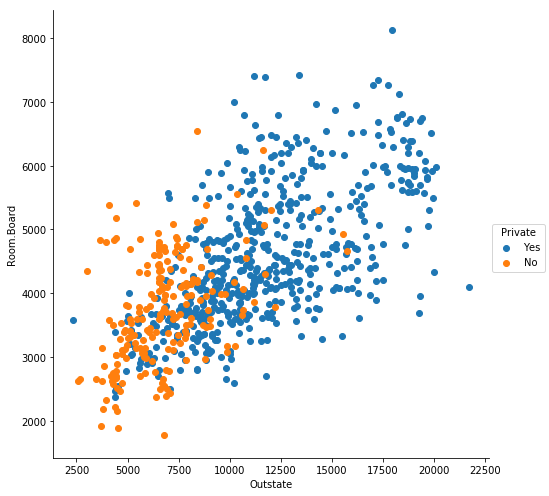

In [144]:
sns.FacetGrid(data,hue='Private',size=7)\
.map(plt.scatter,'Outstate','Room.Board')\
.add_legend()

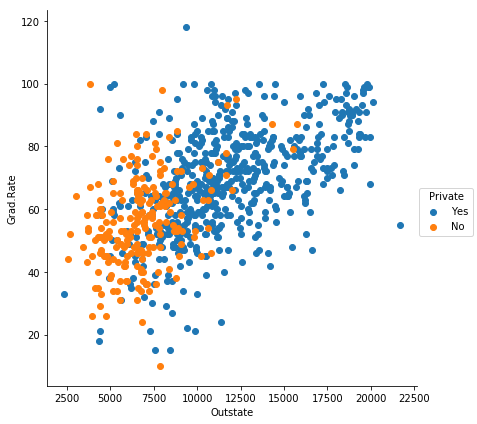

In [145]:
sns.FacetGrid(data,hue='Private',size=6)\
.map(plt.scatter,'Outstate','Grad.Rate')\
.add_legend()

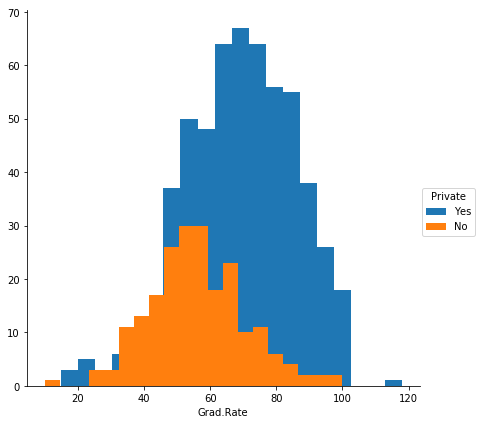

In [146]:
sns.FacetGrid(data,hue='Private',size=6)\
.map(plt.hist,'Grad.Rate',bins=20)\
.add_legend()

In [147]:
wrong_grade=data.index[data['Grad.Rate']>100]

In [148]:
wrong_grade

Int64Index([95], dtype='int64')

In [149]:
data['Grad.Rate'][wrong_grade]=100

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
data[data['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


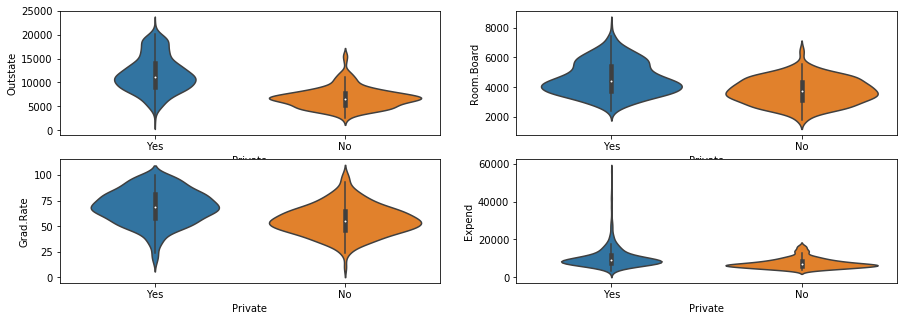

In [151]:
#violin plot describes the data with different class regions
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.violinplot(x='Private',y='Outstate',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Private',y='Room.Board',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Private',y='Grad.Rate',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Private',y='Expend',data=data)

In [66]:
College = pd.get_dummies(data['Unnamed: 0'],drop_first = True)

In [124]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [125]:
#data['Private'] = data['Private'].apply(converter)

In [159]:
data.sample(1)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
11,Allegheny College,Yes,2652,1900,484,44,77,1707,44,17080,4440,400,600,73,91,9.9,41,11711,76


In [183]:
#drop the data which is not required
data_label=data.drop(['Private','Unnamed: 0','Apps','Personal','Terminal','S.F.Ratio'],axis=1)

In [184]:
#preprocess the data and apply mean normalizaion for every column
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(data_label)
X_scaled_array = scaler.transform(data_label)
X_scaled = pd.DataFrame(X_scaled_array, columns = data_label.columns)

In [185]:
#model
#apply kmeans clustering algorithm
kmeans=KMeans(n_clusters=2)
kmeans.fit(X_scaled)
#cluster centers
print(kmeans.cluster_centers_)

[[-0.27584066 -0.21907803 -0.50496978 -0.51047835 -0.18313058  0.01607144
  -0.47652372 -0.37992248 -0.09414796 -0.45841621 -0.33831991 -0.4217228
  -0.3893557 ]
 [ 0.46835446  0.37197623  0.8573966   0.86674969  0.31094046 -0.02728797
   0.80909757  0.64507671  0.15985539  0.77835252  0.57443902  0.71605017
   0.66109354]]


In [ ]:
plt.scatter(x_)

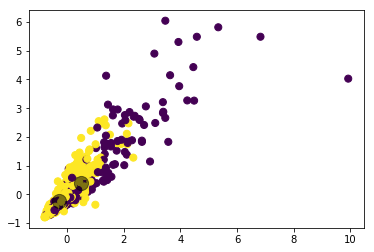

For n_clusters = 2, silhouette score is 0.25225979793268705)


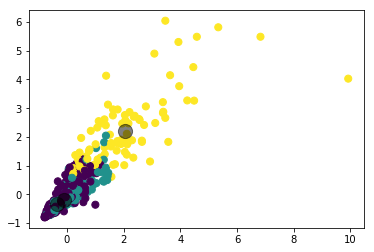

For n_clusters = 3, silhouette score is 0.26965907303872955)


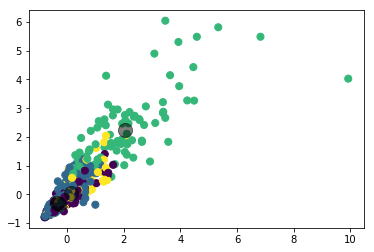

For n_clusters = 4, silhouette score is 0.205554801907454)


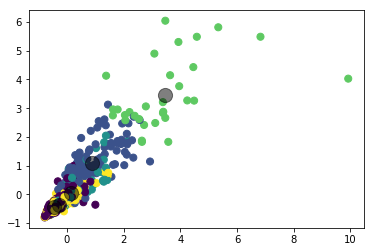

For n_clusters = 5, silhouette score is 0.20287827210182668)


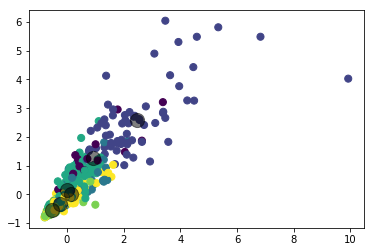

For n_clusters = 6, silhouette score is 0.17364911004743658)


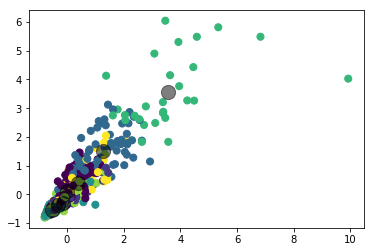

For n_clusters = 7, silhouette score is 0.13811086724419191)


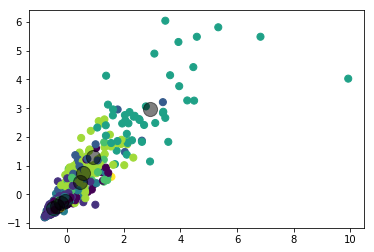

For n_clusters = 8, silhouette score is 0.16858457400769253)


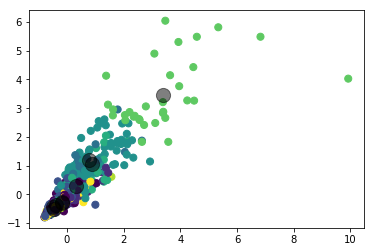

For n_clusters = 9, silhouette score is 0.15465518701721692)


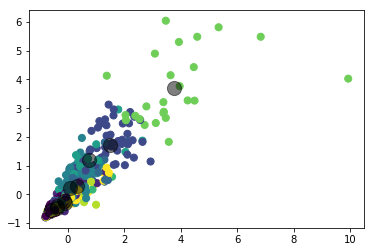

For n_clusters = 10, silhouette score is 0.13733306714669336)


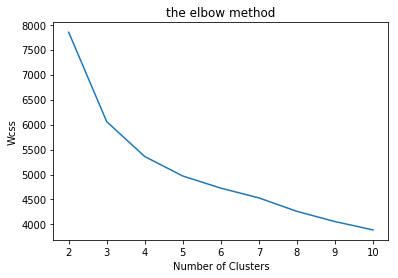

In [188]:
#find the no of clusters
wcss = []
##elbow method to know the number of clusters
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_scaled)
    cluster_an=kmeans.predict(X_scaled)
    wcss.append(kmeans.inertia_)
    plt.scatter(X_scaled_array[:,0],X_scaled_array[:,1],c=cluster_an,s=50)
    centers=kmeans.cluster_centers_
    plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)
    plt.show()
    score = silhouette_score (X_scaled, cluster_an, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(i, score))
    
plt.plot(range(2,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

    